In [1]:
from sympy import *
import import_ipynb
import Linear_ODE_real_evs as real_nb
import Linear_ODE_complex_evs as complex_nb
# Use pretty printing for SymPy `expr`essions
init_printing()

importing Jupyter notebook from Linear_ODE_real_evs.ipynb
importing Jupyter notebook from Linear_ODE_complex_evs.ipynb


# Linear ODEs: solve with Python

In this lecture I will show you how to make [Python] and [SymPy] solve linear ODEs in a few lines of code. I will reuse example ODEs from the other two videos.

[Python]: https://www.python.org "Python programming language"
[SymPy]: https://www.sympy.org "Symboic math in Python"

## Computation with matrix exponential

[SymPy] can compute matrix exponential, so any linear ODE $\dot x=Ax$ can be solved in one line: `x = exp(A * t) * c`, where `c` is the initial condition: `x(0)=c`.

[SymPy]: https://www.sympy.org "Symboic math in Python"

### Distinct real eigenvalues
Consider the ODE $\dot x=Ax$, where $A=\begin{bmatrix}1&2\\2&1\end{bmatrix}$.

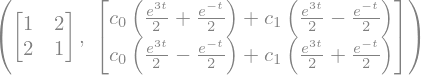

In [25]:
t, c, A = real_nb.t, real_nb.c, real_nb.A
x = exp(A * t) * c
assert x.diff(t).expand() == (A * x).expand(), "Not a solution of $\dot x=Ax$"
assert x.subs(t, 0) == c, "Does not satisfy the initial condition"
assert x.expand() == real_nb.x.expand(), "Solutions obtained by different methods are not equal to each other"
A, x

### Complex eigenvalues

Now let us use matrix exponential to get to the same answer. First, we ask `Python` to compute $\exp(At)$ and verify that it provides us with a solution of $\dot x=Ax$.

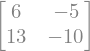

Solutions obtained by different methods are not equal to each other


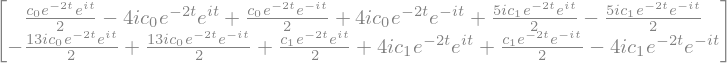

In [27]:
t, c, A = complex_nb.t, complex_nb.c, complex_nb.A
display(A)
x = (exp(A * t) * c).expand()
assert x.diff(t).expand() == (A * x).expand(), "Not a solution of $\dot x=Ax$"
assert x.subs(t, 0) == c, "Does not satisfy the initial condition"
if x.expand() != complex_nb.x.expand():
    print("Solutions obtained by different methods are not equal to each other")
display(x)

The first two `assert`s tell us that `x` is a correct answer. Why is different from the one we found in another file?

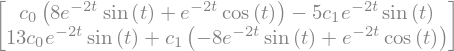

In [10]:
complex_nb.x

Have we found another solution of the same ODE? This would contradict the general theory. But `Python` says that these expressions are different! Why?

Actually, `x` and `complex_nb.x` are two different expressions for the same function, and `Python`s `==` test is not clever enough to figure out that these functions are actually equivalent. In order to make sure that these functions are actually equal, we can, e.g., rewrite all trig functions in `x` in terms of complex exponential. In `Python` this can be done using `x.rewrite(exp)`.

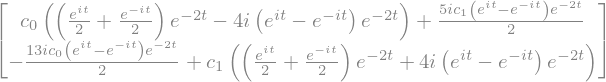

In [6]:
assert complex_nb.x.rewrite(exp).expand() == x.expand()
complex_nb.x.rewrite(exp)

The `assert` line above ensures that the two formulas are equivalent. But it rewrites both formulas in terms of complex exponentials. How can we make `Python` rewrite `x` in terms of trig functions instead?

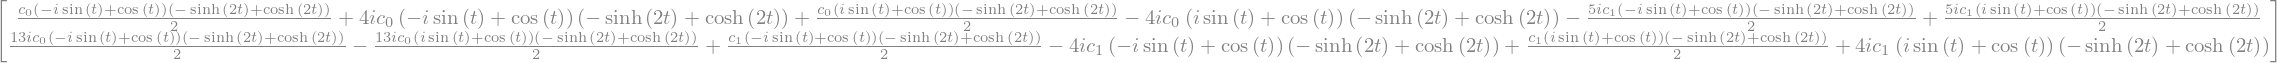

In [7]:
x = x.rewrite(cos)
x

This `rewrite` replaced each $\exp$ with its expression in terms of $\cos$, $\sin$, $\cosh$, and $\sinh$. While it did what we wanted for $e^{\pm it}$, it replaced $e^{-2t}$ with $\cosh(2t)-\sinh(2t)$. I don't know how to prevent this unwanted rewriting, so we'll revert it with another `rewrite`.

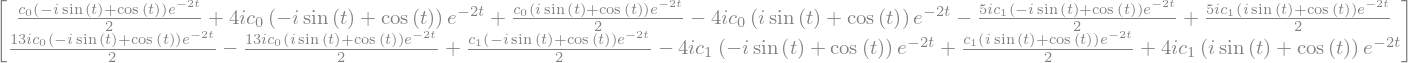

In [8]:
x = x.rewrite([cosh, sinh], exp)
x

Finally, expanding this expression we give the desired result.

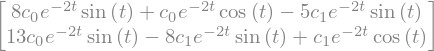

In [11]:
x = expand(x)
assert x == complex_nb.x.expand()
x

Here is the whole computation condensed into one line.

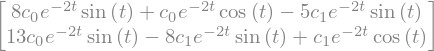

In [12]:
(exp(A * t) * c).expand().rewrite(cos).rewrite([cosh, sinh], exp).expand()

## Computation with `dsolve`

We can also a generic ODE solver `dsolve` to solve the original ODE. Actually, the solver will figure out that our ODE is a linear ODE with constant coefficients and compute $\exp(At)$ but all this will be done for us behind the scene.

**NB**: most nonlinear differential equations can't be solved, and there are many nonlinear ODEs which can be solved but not by `dsolve`.

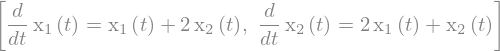

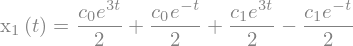

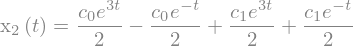

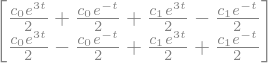

In [24]:
var('x1 x2', cls=Function)
x = Matrix([x1(t), x2(t)])
A, c = real_nb.A, real_nb.c
eqs = [Eq(x.diff(t)[k,0], (A * x)[k,0]) for k in range(2)]
display(eqs)
res = dsolve(eqs, ics = {x1(0): c[0], x2(0): c[1]})
res = [expand(e) for e in res]
display(*res, expand(real_nb.x))

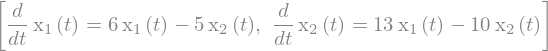

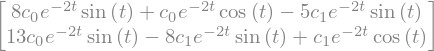

In [23]:
var('x1 x2', cls=Function)
x = Matrix([x1(t), x2(t)])
A, c = complex_nb.A, complex_nb.c
eqs = [Eq(x.diff(t)[k,0], (A * x)[k,0]) for k in range(2)]
display(eqs)
res = dsolve(eqs, ics = {x1(0): c[0], x2(0): c[1]})
res = [expand(e) for e in res]
display(*res, expand(complex_nb.x))